<a href="https://colab.research.google.com/github/AnanyaMaram/Data-Science/blob/master/Adsexp_3%2C4_ananya_github_gist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Looking at the destination dataset

In [ ]:
dest=pd.read_csv("/content/drive/My Drive/ads dataset exp3 exp4/destinations.csv")
print(dest.head())
print(dest.shape)

   srch_destination_id        d1        d2  ...      d147      d148      d149
0                    0 -2.198657 -2.198657  ... -2.198657 -2.198657 -2.198657
1                    1 -2.181690 -2.181690  ... -2.181690 -2.181690 -2.181690
2                    2 -2.183490 -2.224164  ... -2.224164 -2.224164 -2.057548
3                    3 -2.177409 -2.177409  ... -2.177409 -2.177409 -2.177409
4                    4 -2.189562 -2.187783  ... -2.194008 -2.194008 -2.188037

[5 rows x 150 columns]
(62106, 150)


Now looking at the train datasite which has all the information regarding hotel type and hotel locations etc,. The dataset is very large so I split the dataset into different files and then handled it

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ads dataset exp3 exp4/split train data/xae.csv', header=None, names=['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],sep=',')
print(df.shape)
print(df.head())

(1000000, 24)
             date_time  site_name  ...  hotel_market  hotel_cluster
0  2014-06-08 10:14:19         17  ...           104             78
1  2014-06-11 11:15:57         17  ...          1448             90
2  2014-06-11 11:20:42         17  ...          1448              8
3  2014-06-14 13:34:14         17  ...           222             11
4  2014-06-14 13:38:20         17  ...           222             81

[5 rows x 24 columns]


dropping null values in the dataframe


In [ ]:
df=df.dropna()
print(df.shape)
print(df.head())

(644692, 24)
              date_time  site_name  ...  hotel_market  hotel_cluster
51  2014-09-02 16:10:47          2  ...           678              7
52  2014-09-02 16:14:31          2  ...           678             48
53  2014-09-08 16:00:34          2  ...          1154             42
54  2014-02-01 09:17:02          2  ...           564             91
55  2014-02-01 09:55:22          2  ...           564             91

[5 rows x 24 columns]


In [ ]:
df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

The main aim is to predict which hotel_cluster a user will book given the information in their search. There are 100 clusters in total. In another word, we are dealing with a 100 class classification problem.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


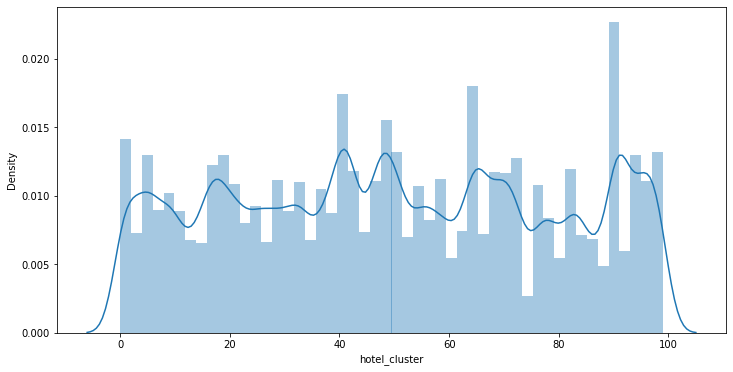

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(df['hotel_cluster'])

Hear we are dealing with date time column which had time date month and year in one column itself. If it is in this way it is difficult to analyse which hotel clusters has maximum bookings in that particular month. The below function creates a column for only year

In [ ]:
from datetime import datetime
def get_year(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013
    pass

This fucnction below creates column for that particular month. 

In [ ]:

def get_month(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass

In [ ]:
def left_merge_dataset(left_dframe, right_dframe, merge_column):
    return pd.merge(left_dframe, right_dframe, on=merge_column, how='left')

dealing with date time year column

In [ ]:
df['date_time_year'] = pd.Series(df.date_time, index = df.index)
df['date_time_month'] = pd.Series(df.date_time, index = df.index)

from datetime import datetime
df.date_time_year = df.date_time_year.apply(lambda x: get_year(x))
df.date_time_month = df.date_time_month.apply(lambda x: get_month(x))
del df['date_time']
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month
51,2,3,66,254,23820,751.3774,753106,0,0,9,2014-09-09,2014-09-13,1,0,1,26364,6,0,2,2,50,678,7,2014,9
52,2,3,66,254,23820,728.9787,753106,0,0,9,2014-09-09,2014-09-13,1,0,1,8229,1,0,1,2,50,678,48,2014,9
53,2,3,66,254,23820,720.7541,753106,0,0,2,2014-09-09,2014-09-13,1,0,1,5775,3,0,2,2,50,1154,42,2014,9
54,2,3,66,174,15081,554.5683,753109,0,1,2,2014-02-18,2014-02-23,2,2,1,11990,1,0,3,2,50,564,91,2014,2
55,2,3,66,174,15081,554.5683,753109,0,1,2,2014-02-18,2014-02-24,2,2,1,11990,1,0,1,2,50,564,91,2014,2


Dealing with srch_ci column

In [ ]:


df['srch_ci_year'] = pd.Series(df.srch_ci, index=df.index)
df['srch_ci_month'] = pd.Series(df.srch_ci, index=df.index)

# convert year & months to int
df.srch_ci_year = df.srch_ci_year.apply(lambda x: get_year(x))
df.srch_ci_month = df.srch_ci_month.apply(lambda x: get_month(x))

# remove the srch_ci column
del df['srch_ci']
print(df.head())

    site_name  posa_continent  ...  srch_ci_year  srch_ci_month
51          2               3  ...          2014              9
52          2               3  ...          2014              9
53          2               3  ...          2014              9
54          2               3  ...          2014              2
55          2               3  ...          2014              2

[5 rows x 26 columns]


In [ ]:
# work on srch_co column

df['srch_co_year'] = pd.Series(df.srch_co, index=df.index)
df['srch_co_month'] = pd.Series(df.srch_co, index=df.index)

# convert year & months to int
df.srch_co_year = df.srch_co_year.apply(lambda x: get_year(x))
df.srch_co_month = df.srch_co_month.apply(lambda x: get_month(x))

# remove the srch_co column
del df['srch_co']
print(df.head())

    site_name  posa_continent  ...  srch_co_year  srch_co_month
51          2               3  ...          2014              9
52          2               3  ...          2014              9
53          2               3  ...          2014              9
54          2               3  ...          2014              2
55          2               3  ...          2014              2

[5 rows x 27 columns]


Finding if there is any correaltion with the hotel cluster. No column correlates linearly with hotel_cluster, this means that linear regression and logistic regression won't work well on our data.

In [ ]:
df.corr()["hotel_cluster"].sort_values()

srch_destination_type_id    -0.034716
site_name                   -0.029022
hotel_country               -0.025852
is_booking                  -0.022604
user_location_country       -0.018672
srch_destination_id         -0.013125
srch_rm_cnt                 -0.005350
srch_ci_month               -0.003303
srch_co_month               -0.003060
date_time_year              -0.001247
channel                     -0.000605
user_location_city          -0.000573
date_time_month              0.002479
cnt                          0.003666
hotel_continent              0.004833
srch_adults_cnt              0.008624
user_id                      0.008657
srch_ci_year                 0.010464
srch_co_year                 0.010559
is_mobile                    0.010717
orig_destination_distance    0.010832
user_location_region         0.011349
posa_continent               0.014024
srch_children_cnt            0.015666
hotel_market                 0.024055
is_package                   0.053803
hotel_cluste

In [ ]:
print(df.columns)
df2=df[['hotel_cluster','date_time_month']]
g=df2.groupby('hotel_cluster')

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'date_time_year', 'date_time_month', 'srch_ci_year', 'srch_ci_month',
       'srch_co_year', 'srch_co_month'],
      dtype='object')


doing groupby with respect to hotel cluster and date time month to find the hotel cluster with highest demand.

In [ ]:
count_df=g.count()
print(count_df)
count_df.reset_index(inplace=True)
count_df['hotel_cluster'][count_df['date_time_month']==count_df['date_time_month'].max()]
print(count_df)

               date_time_month
hotel_cluster                 
0                         8029
1                        10006
2                         6039
3                         3296
4                         7182
...                        ...
95                       10497
96                        7576
97                        6590
98                       10791
99                        6023

[100 rows x 1 columns]
    hotel_cluster  date_time_month
0               0             8029
1               1            10006
2               2             6039
3               3             3296
4               4             7182
..            ...              ...
95             95            10497
96             96             7576
97             97             6590
98             98            10791
99             99             6023

[100 rows x 2 columns]



For known combinations of user location cities, origin-destination distances and search destinations, will definitely help finding hotel cluster. So we are doing group by with those particular columns and finding the sum and count for each hotel cluster. 

In [ ]:
pieces = [df.groupby(['srch_destination_id','hotel_country','hotel_market','hotel_cluster'])['is_booking'].agg(['sum','count'])]
#print(pieces)
agg = pd.concat(pieces).groupby(level=[0,1,2,3]).sum()
agg.dropna(inplace=True)
agg.head()

sum  count
srch_destination_id hotel_country hotel_market hotel_cluster            
4                   7             246          22               0      1
                                               25               1      2
                                               32               1      2
                                               67               0      2
7                   50            422          42               0      1

In [ ]:
agg['sum']

srch_destination_id  hotel_country  hotel_market  hotel_cluster
4                    7              246           22               0
                                                  25               1
                                                  32               1
                                                  67               0
7                    50             422           42               0
                                                                  ..
65035                105            29            43               0
                                                  58               1
65042                50             611           89               0
65047                50             638           15               0
                                                  16               1
Name: sum, Length: 75814, dtype: int64

doing the average sum and avg count for each hotel cluster. 

In [ ]:

agg['sum_and_cnt'] = 0.85*agg['sum'] + 0.15*agg['count']
agg = agg.groupby(level=[0,1,2]).apply(lambda x: x.astype(float)/x.sum())
agg.reset_index(inplace=True)
agg.head()


,srch_destination_id,hotel_country,hotel_market,hotel_cluster,sum,count,sum_and_cnt
0,4,7,246,22,0.0,0.142857,0.054545
1,4,7,246,25,0.5,0.285714,0.418182
2,4,7,246,32,0.5,0.285714,0.418182
3,4,7,246,67,0.0,0.285714,0.109091
4,7,50,422,42,NaN,1.000000,1.000000


In [ ]:
agg['sum']

0        0.0
1        0.5
2        0.5
3        0.0
4        NaN
        ... 
75809    0.0
75810    1.0
75811    NaN
75812    0.0
75813    1.0
Name: sum, Length: 75814, dtype: float64

In [ ]:
agg_pivot = agg.pivot_table(index=['srch_destination_id','hotel_country','hotel_market'], columns='hotel_cluster', values='sum_and_cnt').reset_index()
agg_pivot.head()

hotel_cluster,srch_destination_id,hotel_country,hotel_market,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,4,7,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054545,NaN,NaN,0.418182,NaN,NaN,NaN,NaN,NaN,NaN,0.418182,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,50,422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,50,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157143,NaN,NaN,NaN,NaN,NaN,NaN,0.004286,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045714,0.008571,NaN,NaN,NaN,...,0.004286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.095714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,NaN,0.004286,NaN,NaN,NaN,NaN,NaN
3,10,50,648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,50,824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64,NaN,NaN,0.060000,NaN,NaN,NaN,NaN,NaN


merging the dataframe with destinations dataframe with respect to srch_destination_id which is common in both the dataframes. 

In [ ]:
df = pd.merge(df, dest, how='left', on='srch_destination_id')
df = pd.merge(df, agg_pivot, how='left', on=['srch_destination_id','hotel_country','hotel_market'])
df.fillna(0, inplace=True)
df.shape

(644692, 276)

In [ ]:
df.columns

Index([                'site_name',            'posa_continent',
           'user_location_country',      'user_location_region',
              'user_location_city', 'orig_destination_distance',
                         'user_id',                 'is_mobile',
                      'is_package',                   'channel',
       ...
                                90,                          91,
                                92,                          93,
                                94,                          95,
                                96,                          97,
                                98,                          99],
      dtype='object', length=276)

as we are only intrested in booking events so we are only looking for the rows which has is booking values equal to 1

In [ ]:
df = df.loc[df['is_booking'] == 1]
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
5,2,3,66,174,15081,554.5683,753109,0,1,2,2,2,1,11990,1,1,1,2,50,564,91,2014,2,2014,2,2014,2,-2.178798,-2.210131,-2.210131,-2.210131,-2.159083,-2.123965,-2.189104,-2.194359,-2.206536,-2.195086,-2.151334,-2.210131,-2.195925,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.021127,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.170775,0.0,0.005282,0.010563,0.000000,0.0,0.000000,0.000000,0.000000
12,2,3,66,442,44951,8177.9140,753194,0,0,9,1,0,1,12471,5,1,1,3,48,153,51,2014,8,2014,9,2014,9,-2.203729,-2.201591,-2.224473,-2.215721,-2.152381,-2.001333,-2.224473,-2.224473,-1.895742,-2.217474,-2.215285,-2.224473,-2.134441,...,0.000000,0.01676,0.0,0.0,0.075818,0.0,0.002394,0.0,0.048683,0.007183,0.000000,0.0,0.000000,0.002394,0.0,0.002394,0.043895,0.000000,0.011971,0.0,0.0,0.0,0.02075,0.000000,0.007183,0.0,0.004789,0.0,0.0,0.002394,0.027933,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.120511,0.000000,0.030327
14,2,3,66,447,48649,516.6746,753195,1,0,9,2,0,1,24101,6,1,1,2,50,984,36,2014,11,2014,11,2014,11,-2.079047,-2.237891,-2.087066,-2.237891,-2.062218,-2.050350,-2.203131,-2.198348,-2.182224,-2.236105,-2.030997,-2.237891,-2.083779,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.013575,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.524887,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
42,2,3,66,311,30031,1079.7116,753803,0,1,3,3,0,1,1440,1,1,1,2,50,571,11,2014,10,2014,10,2014,10,-2.215726,-2.230958,-2.230958,-2.230958,-2.034191,-2.085950,-2.116588,-2.230861,-2.230958,-2.168518,-2.167135,-2.230958,-2.129087,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.005445,0.000000,0.0,0.000000,0.000000,0.136116,0.000000,0.0,0.0,0.0,0.00000,0.005445,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.147005,0.0,0.000000,0.010889,0.000000,0.0,0.000000,0.000000,0.000000
45,2,3,66,311,16343,187.3389,753803,0,0,9,4,0,2,8267,1,1,1,2,50,675,98,2014,11,2014,11,2014,11,-2.322565,-2.356244,-2.356791,-2.238242,-1.879221,-1.624715,-2.262388,-2.189171,-2.296162,-2.213122,-2.203796,-2.356791,-2.272856,...,0.002242,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.034231,0.059955,0.141056,0.0,0.011334,0.000553,0.0,0.003271,0.000783,0.013345,0.000000,0.0,0.0,0.0,0.00000,0.014390,0.000000,0.0,0.003624,0.0,0.0,0.000921,0.000184,0.007586,0.0,0.000968,0.000553,0.008216,0.0,0.041449,0.117851,0.000676


As we know that hotel cluster is dependent variable so we are dropping that from x and also we have only included the rows which is booking values as 1 so we are also dropping that

In [ ]:
X = df.drop(['user_id', 'hotel_cluster', 'is_booking'], axis=1)
y = df.hotel_cluster
print(X)
print(y)

        site_name  posa_continent  ...        98        99
5               2               3  ...  0.000000  0.000000
12              2               3  ...  0.000000  0.030327
14              2               3  ...  0.000000  0.000000
42              2               3  ...  0.000000  0.000000
45              2               3  ...  0.117851  0.000676
...           ...             ...  ...       ...       ...
644635         26               0  ...  0.029654  0.000000
644643         26               0  ...  0.000000  0.000000
644667          2               3  ...  0.000000  0.000283
644689          2               3  ...  0.000000  0.152500
644691          2               3  ...  0.000000  0.000000

[52804 rows x 273 columns]
5         91
12        51
14        36
42        11
45        98
          ..
644635    61
644643    52
644667    45
644689    99
644691    59
Name: hotel_cluster, Length: 52804, dtype: int64


In [ ]:
print(X.shape, y.shape)
y.nunique()

(52804, 273) (52804,)


100

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



splitting the data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

training it with decison tree model

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predicted=model.predict(X_test)
print(y_predicted)
# model.score(X_test,y_test)

[59 26 29 ... 50 84 91]


with random forest classifile

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
print(model.fit(X_train,y_train))
y_predicted=model.predict(X_test)
print(y_predicted)
# model.score(X_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[98 26 29 ... 91 84 91]


In [ ]:
'''from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
print(y_predicted)
model.score(X_test,y_test)'''

'from sklearn.svm import SVC\nmodel=SVC()\nmodel.fit(X_train,y_train)\ny_predicted=model.predict(X_test)\nprint(y_predicted)\nmodel.score(X_test,y_test)'